In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

data = pd.read_csv(r"C:\Users\chengyanyang\Desktop\DE_LK3.csv")
print(data.shape)
data.head()
#相關係數矩陣
print(data.corr('spearman'))

(365, 7)
               MA        MU      lost   standby       WIP      move
MA       1.000000  0.506198  0.537519  0.078649  0.027816 -0.051947
MU       0.506198  1.000000  0.030687 -0.794770  0.672575  0.714763
lost     0.537519  0.030687  1.000000  0.253977 -0.353061 -0.293733
standby  0.078649 -0.794770  0.253977  1.000000 -0.756708 -0.885849
WIP      0.027816  0.672575 -0.353061 -0.756708  1.000000  0.829547
move    -0.051947  0.714763 -0.293733 -0.885849  0.829547  1.000000


In [205]:
# 檢查各欄位有無空值
data.isnull().sum() 

Date       0
MA         0
MU         0
lost       0
standby    0
WIP        0
move       0
dtype: int64

0       1012
1       1258
2       1112
3       1022
4       1422
       ...  
360    25792
361    27386
362    25082
363    20890
364    18972
Name: WIP, Length: 365, dtype: int64
0      13078
1      14934
2      13782
3      14192
4      14361
       ...  
360    32414
361    32279
362    34808
363    33955
364    36140
Name: move, Length: 365, dtype: int64


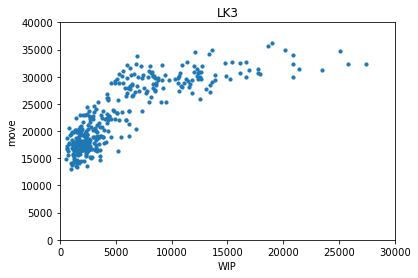

In [243]:
x = data['WIP']
y = data['move']
print(x)
print(y)
# plot
plt.scatter(x,y,s=10)
plt.xlabel('WIP')
plt.ylabel('move')
plt.title("LK3",fontsize=12)
plt.xlim(0,30000)
plt.ylim(0,40000)
plt.show()

(292,)
Accuracy:  0.8002531673371043
訓練集 MSE:  5401886.33974867
Predict Values:  [29788.72727273]


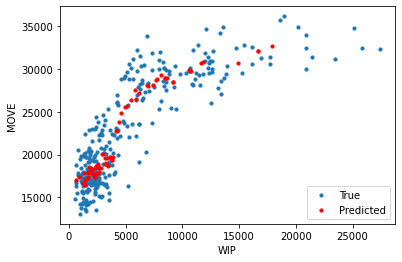

In [260]:
#拆分訓練測試 進行預測
x = x.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(Y_train.shape)

# 進行演算法流程
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, Y_train)
# 得出預測結果(測試集)
predicted= knn.predict(X_test)
print('Accuracy: ',knn.score(X_test, Y_test))
mse = metrics.mean_squared_error(Y_test, predicted)
print('訓練集 MSE: ', mse)

print('Predict Values: ',knn.predict([[12950]]))

plt.scatter(X_train, Y_train, s=10, label='True')
plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.legend()
plt.show()
#=========================================================================================================================

from unittest import result
from sklearn.neighbors import KNeighborsRegressor

# x = x.reshape(-1,1)
# # 建立KNN模型
# knnModel = KNeighborsRegressor(n_neighbors=9)
# # 使用訓練資料訓練模型
# knnModel.fit(x,y)
# # 使用訓練資料預測
# predicted= knnModel.predict(x)
# print('predict',predicted.shape)
# print('Accuracy: ',knnModel.score(x,y))
# print('Predict Values: ',knnModel.predict([[5000]]))
# print('Predict Values: ',knnModel.predict([[12000]]))
# print('Predict Values: ',knnModel.predict([[10000]]))



# # plot
# plt.scatter(x, y, s=10, label='True')
# plt.scatter(x, predicted, color="r",s=10, label='Predicted')
# plt.xlabel('WIP')
# plt.ylabel('MOVE')
# plt.title('Dry Etch')
# plt.title("LK3",fontsize=20)
# plt.xlim(0,30000)
# plt.ylim(0,40000)
# plt.legend()
# plt.show()

In [239]:
print('Predict Values: ', predicted.shape )
print('Predict Values: ', X_test )


Predict Values:  (365, 1)
Predict Values:  [[ 1834]
 [16634]
 [ 3257]
 [ 2176]
 [ 1230]
 [ 6844]
 [  647]
 [ 7764]
 [11813]
 [ 1888]
 [ 3046]
 [ 1688]
 [17871]
 [ 8640]
 [ 8476]
 [ 2832]
 [10594]
 [ 3340]
 [ 3780]
 [ 1451]
 [ 1338]
 [ 2621]
 [ 3236]
 [10686]
 [11630]
 [10722]
 [ 2403]
 [ 6944]
 [ 3654]
 [ 4583]
 [ 5469]
 [ 2636]
 [ 3206]
 [ 1916]
 [ 3194]
 [ 1625]
 [ 1459]
 [ 2343]
 [16656]
 [ 2108]
 [ 4216]
 [ 8450]
 [ 4376]
 [14910]
 [ 3437]
 [ 9166]
 [ 4167]
 [ 3876]
 [ 7680]
 [ 2480]
 [ 6211]
 [ 2424]
 [ 5919]
 [ 1649]
 [ 1695]
 [  920]
 [ 3606]
 [ 2686]
 [ 2287]
 [ 2338]
 [ 5848]
 [ 8116]
 [ 1985]
 [ 2545]
 [ 7386]
 [ 9158]
 [ 2329]
 [ 3846]
 [ 5088]
 [ 2568]
 [ 1745]
 [ 4927]
 [ 2921]]


In [235]:
#印出預測結果
dataframe = pd.DataFrame({'y_pre':predicted  })
dataframe.to_csv("testLK3.csv",index=False,sep=',') 

ValueError: If using all scalar values, you must pass an index

In [236]:
from scipy.stats import linregress
x = [5000,10000]
y = [24895, 28065]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)
print(intercept)

0.634
21725.0


In [237]:
#標準化資料
# from sklearn.preprocessing import MinMaxScaler

# y = y.reshape(-1,1)
# scaler = MinMaxScaler(feature_range=(0, 1)).fit(x)
# scaler = MinMaxScaler(feature_range=(0, 1)).fit(y)
# x_scaled = scaler.transform(x)
# y_scaled = scaler.transform(y)
# print('資料集 X 的平均值 : ', x.mean(axis=0))
# print('資料集 X 的標準差 : ', x.std(axis=0))
# print('標準化後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
# print('標準化後後資料集 X 的標準差 : ', x_scaled.std(axis=0))
# print('==========================================================')
# print('資料集 Y 的平均值 : ', y.mean(axis=0))
# print('資料集 Y 的標準差 : ', y.std(axis=0))
# print('標準化後資料集 Y 的平均值 : ', y_scaled.mean(axis=0))
# print('標準化後後資料集 Y 的標準差 : ', y_scaled.std(axis=0))
# print(x_scaled.shape)


Accuracy:  0.8330934941047141
 MSE:  0.011086727082484479
Predict Values:  [[0.87217067]]


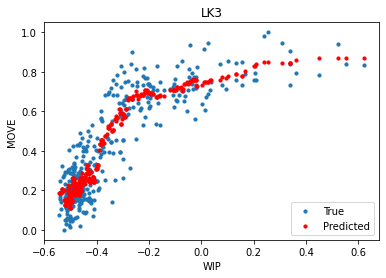

In [263]:
from sklearn.neighbors import KNeighborsRegressor

x_scaled = x_scaled.reshape(-1,1)
# 建立KNN模型
knnModel = KNeighborsRegressor(n_neighbors=11)
# 使用訓練資料訓練模型
knnModel.fit(x_scaled,y_scaled)
# 使用訓練資料預測
predicted= knnModel.predict(x_scaled)
print('Accuracy: ',knnModel.score(x_scaled,y_scaled))
mse = metrics.mean_squared_error(y_scaled, predicted)
print(' MSE: ', mse)
print('Predict Values: ',knnModel.predict([[80000]]))
# plot
plt.scatter(x_scaled, y_scaled, s=10, label='True')
plt.scatter(x_scaled, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.title('LK3')
plt.legend()
plt.show()

In [174]:
#摘分訓練集測試集
X=x_scaled
Y=y_scaled
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(Y_train.shape)

(273, 1)


In [176]:
# 進行演算法流程
knn = KNeighborsRegressor(n_neighbors=8)
# 訓練資料
knn.fit(X_train, Y_train)
# 得出預測結果(測試集)
predicted= knn.predict(X_test)
print('Accuracy: ',knn.score(X_test, Y_test))
mse = metrics.mean_squared_error(Y_test, predicted)
print('訓練集 MSE: ', mse)
print('Predict Values: ',knn.predict([[80000]]))
#print('predict',predicted)

Accuracy:  0.8185623421413106
訓練集 MSE:  0.010314405289562989
predict [[0.25024391]
 [0.81028315]
 [0.27050993]
 [0.1937332 ]
 [0.14471316]
 [0.64130388]
 [0.16187343]
 [0.69326164]
 [0.79010385]
 [0.22096414]
 [0.32807215]
 [0.18199311]
 [0.85977474]
 [0.69516412]
 [0.69516412]
 [0.26799497]
 [0.73928432]
 [0.29793058]
 [0.30328571]
 [0.1287616 ]
 [0.23816777]
 [0.25341471]
 [0.27050993]
 [0.73928432]
 [0.77305741]
 [0.73928432]
 [0.23776125]
 [0.65880561]
 [0.25650963]
 [0.47014569]
 [0.56265718]
 [0.21841124]
 [0.27245035]
 [0.23912172]
 [0.28122561]
 [0.16827465]
 [0.13983501]
 [0.2203896 ]
 [0.81028315]
 [0.23354436]
 [0.43347281]
 [0.69516412]
 [0.45650854]
 [0.77861851]
 [0.2588403 ]
 [0.64549909]
 [0.43058386]
 [0.31666811]
 [0.69326164]
 [0.18697424]
 [0.5821427 ]
 [0.21186909]
 [0.62568836]
 [0.16664318]
 [0.19398795]
 [0.19696904]
 [0.25106777]
 [0.21841124]
 [0.1832018 ]
 [0.2203896 ]
 [0.62553118]
 [0.71619439]
 [0.23769079]
 [0.22849818]
 [0.69488227]
 [0.64549909]
 [0.179

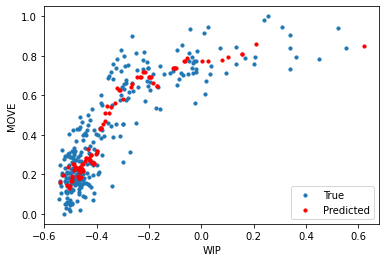

In [167]:
# plot
plt.scatter(X_train, Y_train, s=10, label='True')
plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.legend()
plt.show()